<a href="https://colab.research.google.com/github/Mizuto07/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### pandas  
  
  クックパッドから、1か月分の朝食、昼食、夕食の献立が組めるだけの料理に関するデータをスクレイピングしたエクセルファイルを基に自動で献立を作成してくれるプログラムを作ります  
  抽出したデータは料理名、必要な食材、その料理の作り方が書かれているページのURLの４つ  
  URLを基にそのページに飛べるQRコードも生成します。  
  このプログラムにより、毎日の献立を考えるわずらわしさから解放されます。
  githubの同じリポジトリにある、work1-screipingにスクレイピングするのプログラムを置きました。確認お願いします。
  
  

In [1]:
!wget "https://drive.google.com/uc?export=download&id=1dQ-BdpUZjwJUFi29GwnPD0LIG94_pwjR" -O foods.xlsx
!wget "https://drive.google.com/uc?export=download&id=1aPg1xuNaQkUyxrHmX0kY0kQUtpS3PuNJ" -O qrcodes.zip
!unzip -o qrcodes.zip

--2022-12-25 05:10:49--  https://drive.google.com/uc?export=download&id=1dQ-BdpUZjwJUFi29GwnPD0LIG94_pwjR
Resolving drive.google.com (drive.google.com)... 172.217.219.102, 172.217.219.138, 172.217.219.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.219.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2sp7ujjoll8noe2a61daqfofe4tf3mru/1671945000000/14515225222220898049/*/1dQ-BdpUZjwJUFi29GwnPD0LIG94_pwjR?e=download&uuid=e146e7af-cadb-45c0-acd8-c1eb42d315e9 [following]
--2022-12-25 05:10:50--  https://doc-0o-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2sp7ujjoll8noe2a61daqfofe4tf3mru/1671945000000/14515225222220898049/*/1dQ-BdpUZjwJUFi29GwnPD0LIG94_pwjR?e=download&uuid=e146e7af-cadb-45c0-acd8-c1eb42d315e9
Resolving doc-0o-9o-docs.googleusercontent.com (doc-0o-9o-docs.googleusercontent.com)... 173.194.192.132, 

In [2]:
import pandas as pd
import openpyxl
import random
from IPython.display import Image,display_png

In [3]:
# ファイル読み込み
df = pd.read_excel('foods.xlsx')
# df.info()
df = df.fillna('-')
headers = ['料理名']
headerNum = [headers.append(f'具材{i+1}') for i in range(len(df.columns)-1)]
df.columns = headers
idxLi = [f'{ix}' for ix in range(1, len(df)+1)]
df = df.set_axis(idxLi, axis=0)
#df

今日の献立は

朝食は 冬だ！おでんだ！屋台だ！鶏ガラのおでん！


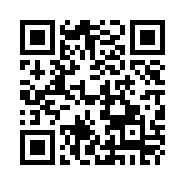


昼食は セロリと牛肉の変わりチャーハン



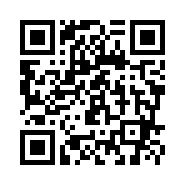


夕食は プチッと鍋●鶏肉と菊菜のにこみうどん鍋



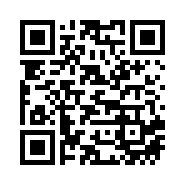


です！


,朝食,昼食,夕食
0,冬だ！おでんだ！屋台だ！鶏ガラのおでん！,セロリと牛肉の変わりチャーハン,プチッと鍋●鶏肉と菊菜のにこみうどん鍋
1,好きな具材,☆玉ねぎ,鶏肉(胸肉)
2,好きな調味料,☆生姜,白菜（ザク切り）
3,鶏ガラ,☆セロリの茎,菊菜
4,豚バラブロック,セロリの葉,豆腐
5,https://cookpad.com/recipe/7400214,卵,うどん
6,-,△自然塩,キノコ（マイタケ）
7,-,▲胡椒,水
8,-,米油,プチッと
9,-,牛切り落とし,https://cookpad.com/recipe/7392863


In [4]:
sampleNums = [idx for idx in range(1, len(df.index))]
foodNums = random.sample(sampleNums , k=3) # dfの全体の行数からランダムに3つの数を選ぶ


foodDf = pd.DataFrame()


foodLi =[]
for i, num in enumerate(foodNums):
  names = []

  for j in range(len(df.columns)):
    if j == 0:
      v = df['料理名'][num] # 選ばれた料理の料理名を取り出す
      names.append(v)
    else:
      m = df[f'具材{j}'][num] # 選ばれた料理の具材を順に取り出す
      names.append(m)
  else:
    foodLi.append(names) # 3種類の料理名とその具材がはいった2次元リストになる
  

  if i == 0: # 一周目 朝食
    breakfast = df['料理名'][num] # 料理名のみを代入する  列:料理名 行;random.sampleで選ばれた数(num) 
    b_lineNum = df.index.get_loc(f'{num}') # lineNumは0始まり
  elif i == 1: # 二周目 昼食
    lunch = df['料理名'][num]
    l_lineNum = df.index.get_loc(f'{num}')
  elif i == 2: # 三周目 夕食
    dinner = df['料理名'][num]
    d_lineNum = df.index.get_loc(f'{num}')


print(f'今日の献立は\n\n朝食は {breakfast}')
display_png(Image(f'/content/qrcodes/{b_lineNum}.png'))
print(f'\n昼食は {lunch}\n')
display_png(Image(f'/content/qrcodes/{l_lineNum}.png'))
print(f'\n夕食は {dinner}\n')
display_png(Image(f'/content/qrcodes/{d_lineNum}.png'))
print(f'\nです！')
foodDf['朝食'] = foodLi[0] #  ２次元リストから代入
foodDf['昼食'] = foodLi[1]
foodDf['夕食'] = foodLi[2]
foodDf